### 形态学-腐蚀
- cv2.erode
    - kernel 每次腐蚀大小
    - iteration 腐蚀次数

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


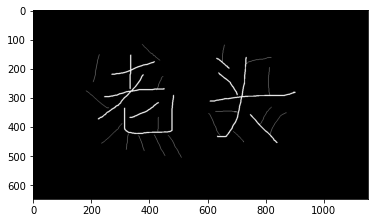

In [3]:
img = cv2.imread("data/laotou.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af74060898>)

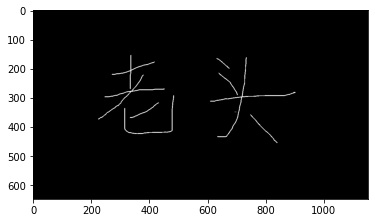

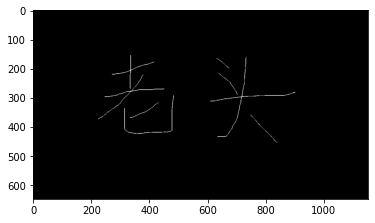

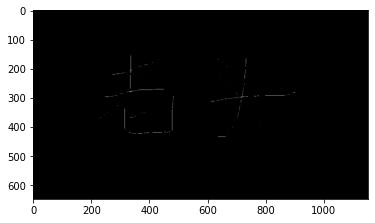

In [12]:
# 线条变细，毛刺消失
kernel1 = np.ones((2, 2), np.uint8)
erosion1 = cv2.erode(img, kernel1, iterations=1)
kernel2 = np.ones((3, 3), np.uint8)
erosion2 = cv2.erode(img, kernel2, iterations=1)
kernel3 = np.ones((4, 4), np.uint8)
erosion3 = cv2.erode(img, kernel3, iterations=1)
plt.figure(1),plt.imshow(erosion1, cmap="gray")
plt.figure(2),plt.imshow(erosion2, cmap="gray")
plt.figure(3),plt.imshow(erosion3, cmap="gray")

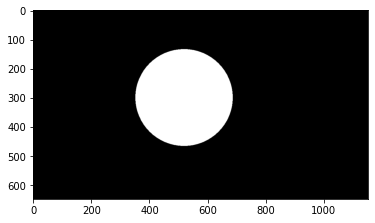

In [7]:
pie = cv2.imread("data/pie.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(pie, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af73e915c0>)

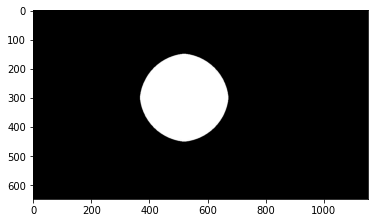

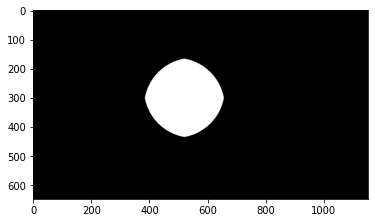

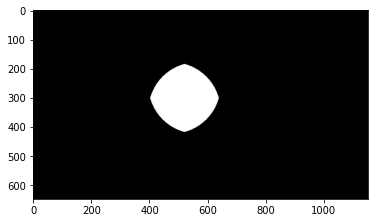

In [10]:
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(pie, kernel, iterations=1)
erosion_2 = cv2.erode(pie, kernel, iterations=2)
erosion_3 = cv2.erode(pie, kernel, iterations=3)
plt.figure(1),plt.imshow(erosion_1, cmap="gray")
plt.figure(2),plt.imshow(erosion_2, cmap="gray")
plt.figure(3),plt.imshow(erosion_3, cmap="gray")

### 形态学-膨胀

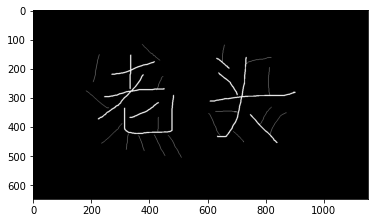

In [13]:
img = cv2.imread("data/laotou.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af7507d630>)

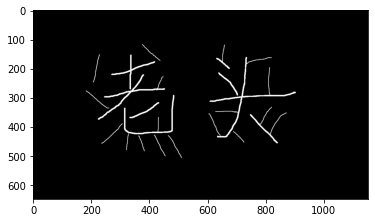

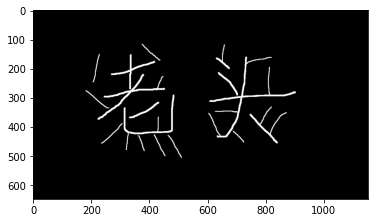

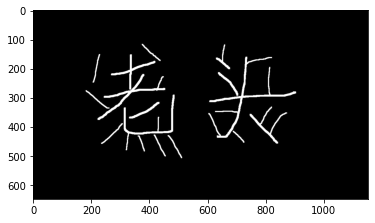

In [14]:
# 线条变粗，毛刺加重
kernel1 = np.ones((2, 2), np.uint8)
dilate1 = cv2.dilate(img, kernel1, iterations=1)
kernel2 = np.ones((3, 3), np.uint8)
dilate2 = cv2.dilate(img, kernel2, iterations=1)
kernel3 = np.ones((4, 4), np.uint8)
dilate3 = cv2.dilate(img, kernel3, iterations=1)
plt.figure(1),plt.imshow(dilate1, cmap="gray")
plt.figure(2),plt.imshow(dilate2, cmap="gray")
plt.figure(3),plt.imshow(dilate3, cmap="gray")

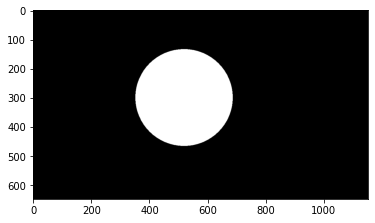

In [15]:
pie = cv2.imread("data/pie.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(pie, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af752ccf28>)

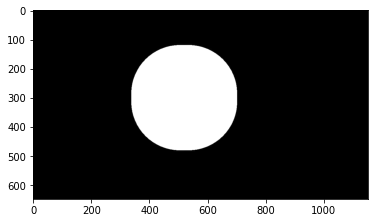

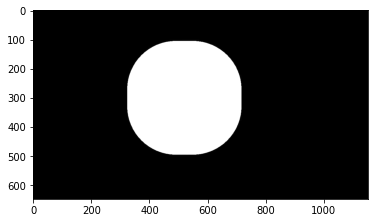

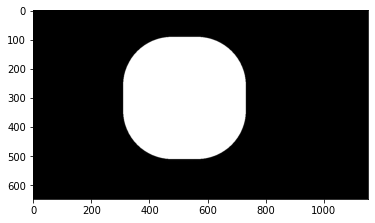

In [17]:
kernel = np.ones((30, 30), np.uint8)
dilate_1 = cv2.dilate(pie, kernel, iterations=1)
dilate_2 = cv2.dilate(pie, kernel, iterations=2)
dilate_3 = cv2.dilate(pie, kernel, iterations=3)
plt.figure(1),plt.imshow(dilate_1, cmap="gray")
plt.figure(2),plt.imshow(dilate_2, cmap="gray")
plt.figure(3),plt.imshow(dilate_3, cmap="gray")

### 开运算-先腐蚀再膨胀

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af7534e7b8>)

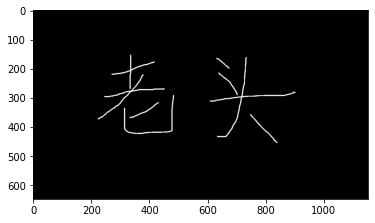

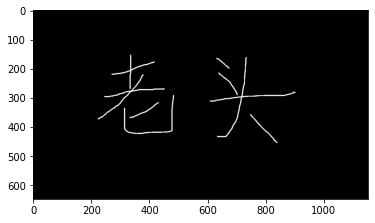

In [24]:
# 闭操作
kernel = np.ones((3,3))
erode1 = cv2.erode(img,kernel,iterations=1)
dilate = cv2.dilate(erode1,kernel,iterations=1)
plt.figure(1),plt.imshow(dilate,cmap="gray")

res = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
plt.figure(2),plt.imshow(res,cmap="gray")

### 闭运算-先膨胀再腐蚀

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1af751d6278>)

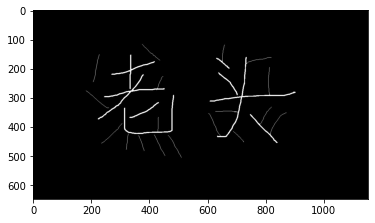

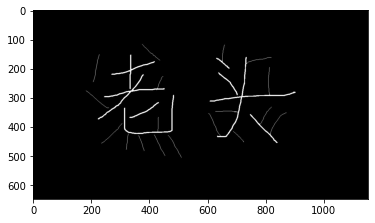

In [25]:
kernel = np.ones((3,3))
dilate = cv2.dilate(img,kernel,iterations=1)
erode1 = cv2.erode(dilate,kernel,iterations=1)
plt.figure(1),plt.imshow(erode1,cmap="gray")

res = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
plt.figure(2),plt.imshow(res,cmap="gray")

### 梯度运算

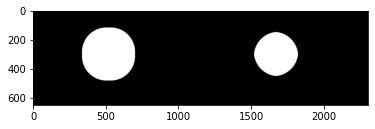

In [26]:
pie = cv2.imread("data/pie.jpg",cv2.IMREAD_GRAYSCALE)
kernel = np.ones((7,7),np.uint8)
dilate = cv2.dilate(pie,kernel,iterations=5)
erosion = cv2.erode(pie,kernel,iterations=5)

res = np.hstack((dilate,erosion))
plt.imshow(res,cmap="gray")

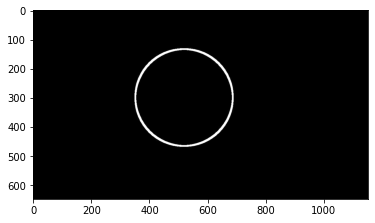

In [27]:
# 膨胀操作-腐蚀操作
gradient = cv2.morphologyEx(pie,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient,cmap="gray")

### 图像梯度-Sobel算子
dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
- ddepth： 图像深度(元素的数字类型)
- dx\dy： 水平垂直方向
- ksize：是Sobel算子大小

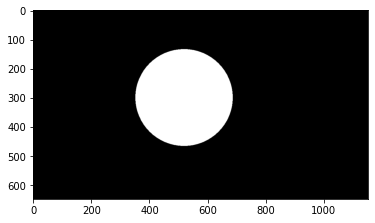

In [20]:
img = cv2.imread("data/pie.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

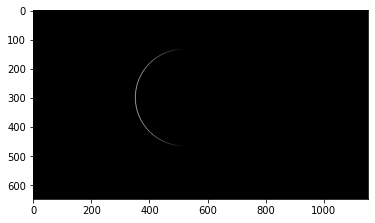

In [27]:
sobel_x = cv2.Sobel(src=img,ddepth=cv2.CV_8U,dx=1,dy=0,ksize=1)
plt.imshow(sobel_x,cmap="gray")

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

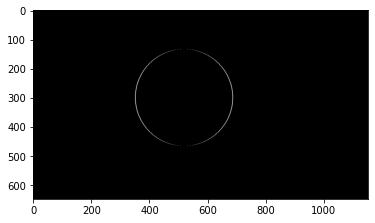

In [31]:
sobel_x = cv2.Sobel(src=img,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=1)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
plt.imshow(sobel_x_abs,cmap="gray")

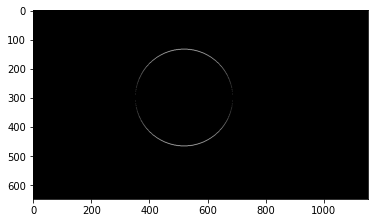

In [32]:
sobel_y = cv2.Sobel(src=img,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=1)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
plt.imshow(sobel_y_abs,cmap="gray")

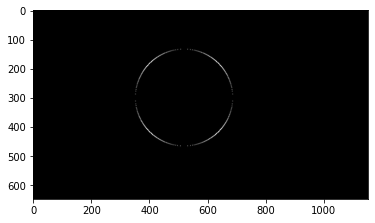

In [37]:
# 不建议直接使用dx=1 dy=1获取边界梯度
sobel_x_y = cv2.Sobel(src=img,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=1)
sobel_x_y_abs = cv2.convertScaleAbs(sobel_x_y)
plt.imshow(sobel_x_y_abs,cmap="gray")

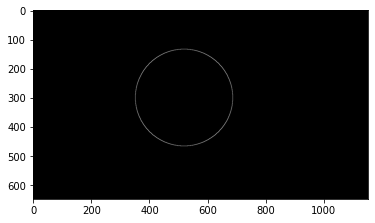

In [38]:
sobel_xy = cv2.addWeighted(sobel_x_abs,0.5,sobel_y_abs,0.5,0)
plt.imshow(sobel_xy,cmap="gray")

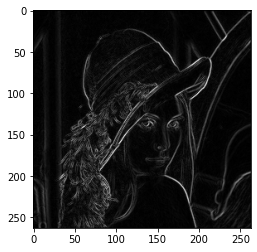

In [41]:
lena = cv2.imread("data/lena.jpg",cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(src=lena,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=1)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.Sobel(src=lena,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=1)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
lena_grad = cv2.addWeighted(sobel_x_abs,0.5,sobel_y_abs,0.5,0)
plt.imshow(lena_grad,cmap="gray")


不同算子的区别

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x246ce760780>)

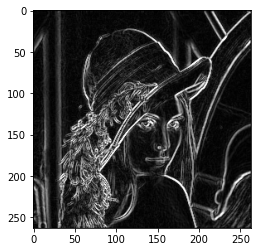

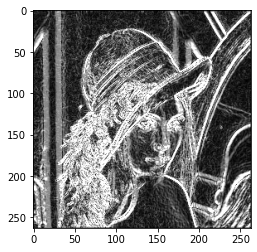

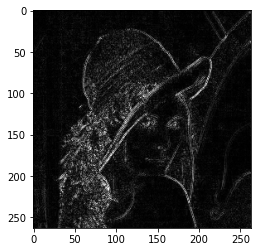

In [42]:
lena = cv2.imread("data/lena.jpg",cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(src=lena,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=3)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.Sobel(src=lena,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=3)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
lena_grad = cv2.addWeighted(sobel_x_abs,0.5,sobel_y_abs,0.5,0)
plt.figure(1),plt.imshow(lena_grad,cmap="gray")

sobel_x = cv2.Scharr(src=lena,ddepth=cv2.CV_64F,dx=1,dy=0)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.Scharr(src=lena,ddepth=cv2.CV_64F,dx=0,dy=1)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
lena_grad = cv2.addWeighted(sobel_x_abs,0.5,sobel_y_abs,0.5,0)
plt.figure(2),plt.imshow(lena_grad,cmap="gray")

Laplacian = cv2.Laplacian(src=lena,ddepth=cv2.CV_64F)
Laplacian_abs = cv2.convertScaleAbs(Laplacian)
plt.figure(3),plt.imshow(Laplacian_abs,cmap="gray")

